# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ali Abbasi
2.   Student Number: 98105879


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv", index_col=0)

# implement the split part
# name them: x_train, x_test, y_train, y_test
np.random.seed(25)
dataset = dataset.sample(frac=1).reset_index(drop=True)
train_ratio = 0.8
train_len = int(train_ratio * len(dataset))
train = dataset[:train_len]
test = dataset[train_len:]
x_train = train.X.to_numpy().reshape(-1, 1)
y_train = train.Y.to_numpy()

x_test = test.X.to_numpy().reshape(-1, 1)
y_test = test.Y.to_numpy()

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.concatenate([x_train, np.ones_like(x_train)], axis=1)
m = np.linalg.inv(A.T @ A) @ A.T @ y_train
m

array([-0.98421784,  0.80771867])

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.33755001627406583
MSE test error: 0.30808615332876665


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

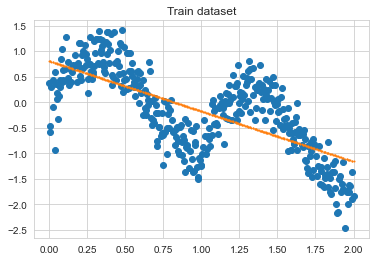

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0] * x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

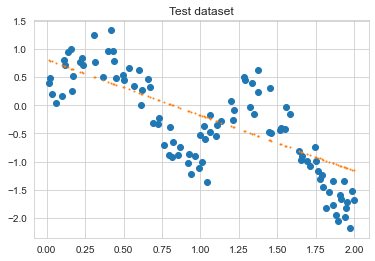

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0] * x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?
Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

1. Considering small values of `y_train` (between -2 and 2), 0.3 square error with true y on average is not a acceptable accuracy.
2. No it wasn't! There is some sinusoidal (or higher degree polynomial) like behaviour in y-x plot which our simple linear model can't adapt to it.
3. The main problem is strength of our model in estimating the function y=f(x). We supposed that f is a simple linear function. One good solution would be using higher order polynomial functions for finding relations between y and x.


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes! Due to relatively large number of datapoints, this non-parametric method will perform well in the range of data we have.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def dist2(X, Y):
    sx = np.sum(X ** 2, axis=1, keepdims=True)
    sy = np.sum(Y ** 2, axis=1, keepdims=True)
    return -2 * X.dot(Y.T) + sx + sy.T


def get_weight_matrix(query_x, X_train, scale):
    n, d = X_train.shape
    dists = dist2(np.reshape(query_x, (1, -1)), X_train)[0]
    W = np.diag(np.exp(-dists / (2 * scale * scale)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, scale):
    n, d = train_X.shape
    X = np.hstack((train_X, np.ones((n, 1))))
    qx = np.concatenate([query_x, [1]])
    W = get_weight_matrix(qx, X, scale)

    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ train_Y

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
scale = 0.1
predicted_test = [predict(x_train, y_train, query, scale) for query in x_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.07306713664853992


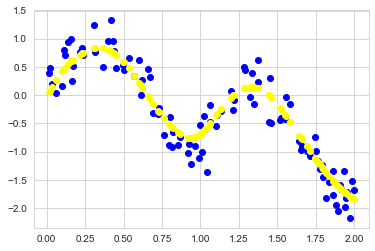

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes much better. There is a smooth curve predicting y values for test data with very good average error.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

It will perform well for xs in range of existing xs in our dataset.

### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, X1, X2):
        # implement the distance function
        return dist2(X1, X2)

    def return_nn_ids(self, x):
        dists = self.distance(np.reshape(x, (1, -1)), self.X)[0]
        # find indices of k nearest neighbours to x
        indices = np.argsort(dists)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [13]:
best_k = 1
best_err = np.inf
for k in np.random.randint(1, 20, size=10):
    error_knn, _ = evaluation(k, x_train, y_train, x_test, y_test)
    if error_knn < best_err:
        best_k = k
        best_err = error_knn
print(f'best k={best_k}')
error_knn, predicted_y = evaluation(best_k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

best k=7
MSE error of KNN for test dataset: 0.07449446916396216


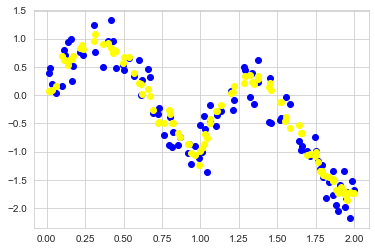

In [14]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes it is almost as good as Locally Weighted Regression on our test data. But one shortcoming of this model is if we predict y for any x higher than 2 or lower than zero (numbers not present in the dataset), it will predict same y as x=2 or x=0 (because they are their nearest neighbor!); while Locally Weighted Regression perceives some of its nearest neighbors' behaviours and predict accordingly. For example, it may predict a line similar to xs in range 0 and 0.25 for xs lower than 0.